**Cluster Analysis**

Clustering is one of the types of unsupervised learning. It is similar to classification: the aim is to give a label to each data point. However, unlike in classification, we are not given any examples of labels associated with the data points. We must infer from the data, which data points belong to the same cluster. This can be achieved using some notion of distance between the data points. Data points in the same cluster are somehow close to each other.

One of the simplest clustering methods is the k-means clustering. It aims at producing a clustering that is optimal in the following sense:  

*   the centre of each cluster is the average of all points in the cluster
*   any point in a cluster is closer to its centre than to a centre of any other cluster


The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

* any data point is set to belong to a cluster, whose centre is closest to it
* then for each cluster a new centre is chosen as the average of the data points in the cluster

This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

**Simple example -- KMeans** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


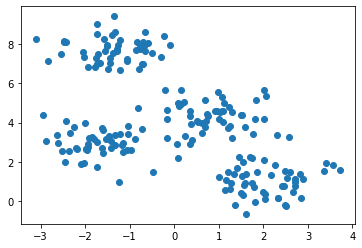

In [4]:
plt.scatter(X[:,0],X[:,1]);

Let’s see if the k-means algorithm can recover these clusters. First we create the instance of the k-means model by giving it the number of clusters 4 as a hyperparameter.

In [5]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[ 2.07464749  0.9869902 ]
 [-1.36512238  7.70188306]
 [ 0.86008475  4.31501411]
 [-1.70639178  2.9104771 ]]


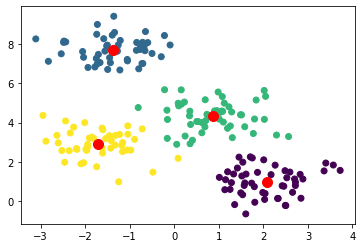

In [6]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

**The k-means algorithm can have difficulties when the clusters are not convex shapes**

In [7]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

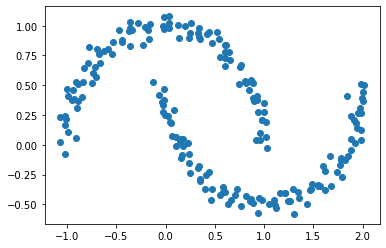

In [8]:
plt.scatter(X[:,0], X[:,1]);

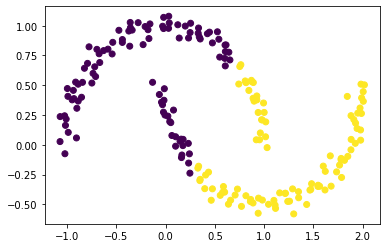

In [9]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

The KMeans clustering does not work well now, since it is not possible to separate the two clusters with a line. We could embed this data set into a higher dimensional space, where the separation is possible. And then apply the k-means clustering.

Alternatively, we can use a different type of clustering algorithm for this case. The DBSCAN algorithm is based on densities and works well on data whose density in the clusters is uniform.

The good news is that DBSCAN does not require the user to specify the number of clusters. But now the algorithm depends on another hyperparameter: a threshold for distance (here 0.3).

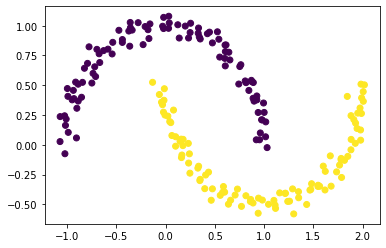

In [10]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);